# Probabilistic Principal Component Analysis Implementation 
Implementation of Probabilistic PCA (ppca) algorithm using EM algorithm

**References**
* Tipping, M. E., & Bishop, C. M. (1999). Probabilistic Principal Component Analysis, 611–622.

***
## Probability model 
Our latent variable model for d-dimensional observation vector $y$ with q-dimentional latent vector $x$ is defined as follows
\begin{align}
y &= \mathbf{W}x + \mu + \epsilon \\
x &\sim \mathcal{N} (0,I) \\
\epsilon &\sim \mathcal{N} (0,\sigma^2I)
\end{align}

where $ \mathbf{W} $ is $d \times q$ matrix. 

Then the conditional distribution of $y$ over $x$ is given by
\begin{equation}
p(y|x) = \mathcal{N} (\mathbf{W}x+\mu, \sigma^2I)
\end{equation}
and marginal distribution of $y$
\begin{equation}
p(y) = \mathcal{N} (\mu, C)
\end{equation}
where the observation covariance is specified by 
\begin{equation}
C = \mathbf{W}\mathbf{W}^\intercal +\sigma^2I
\end{equation}

Finally, the posterior distribution $p(x|y)$ can be computed as follows
\begin{align}
p(x|y,\mathbf{W},\sigma) & = \mathcal{N} \left(\mathbf{W}^\intercal C^{-1} \left(y - \mu \right),  I - \mathbf{W}^\intercal C^{-1} \mathbf{W}\right) \\
                         & = \mathcal{N} \left( M^{-1}\mathbf{W}^\intercal \left(y - \mu \right),  \sigma^2 M^{-1}\right)
\end{align}
where $ M = \mathbf{W}^\intercal\mathbf{W} +\sigma^2I $.
***



## EM for PPCA 
The complete log-likelihood of the model, including both observation $\mathbf{Y} = (y_1,y_2,\cdots,y_N)$ and latent variable $\mathbf{X} = (x_1,x_2,\cdots,x_N)$, is
\begin{align}
\mathcal{L} & = \log p(\mathbf{Y},\mathbf{Z}|\mu, \mathbf{W}, \sigma^2)  \\
            & = \sum_{i=1}^N \left( \log p(y_i|x_i) + \log p(x_i)\right) \\
\end{align}
### E-step 
In the $\mathbf{E}$-Step, we take the expectation of $\mathcal{L}$ with respect to the posterior distribution $p(x|y,\mathbf{W},\sigma)$
\begin{align}
\mathbf{E}\left[\mathcal{L}\right]  = &-\frac{nd}{2}\log2\pi\sigma^2 
                                       -\frac{1}{2\sigma^2}\sum_{i=1}^N||y_i-\mu||_2 
                                       +\frac{1}{\sigma^2}\sum_{i=1}^N \mathbf{E}[x_i | y_i]^\intercal \mathbf{W}^\intercal (y_i-\mu) 
                                       -\frac{1}{2\sigma^2}Tr\left( \mathbf{E}[x_i x_i^\intercal|y_i]\mathbf{W}^\intercal \mathbf{W} \right)\\
                                    &-\frac{nq}{2}\log2\pi -\frac{1}{2}\sum_{i=1}^N \mathbf{E}[x_i x_i^\intercal|y_i]
\end{align}
The conditional expectations $\mathbf{E}[x_i|y_i]$ and $\mathbf{E}[x_i x_i^\intercal|y_i]$ can be estimated using current value
\begin{align}
\mathbf{E}[x_i|y_i] & =  M^{-1}\mathbf{W}^\intercal \left(y - \bar{y} \right) \\
\mathbf{E}[x_i x_i^\intercal|y_i] & = Var(x_i) + \mathbf{E}[x_i]\mathbf{E}[x_i]^\intercal  \\
                                  & = \sigma^2 M^{-1}+ \mathbf{E}[x_i]\mathbf{E}[x_i]^\intercal  
\end{align}

### M-step
In the $\mathbf{M}$-Step, we maximize $\mathbf{E}\left[\mathcal{L}\right]$ with respect to $\mathbf{W}$ and $\sigma^2$.
First, take the derivative of $\mathbf{E}\left[\mathcal{L}\right]$ with respect to $\mathbf{W}$ and set it to 0, to get the updated $\mathbf{W}_{new}$
\begin{align}
\frac{\partial\mathbf{E}\left[\mathcal{L}\right]}{\partial \mathbf{W}} & = \frac{1}{\sigma^2}\sum_{i=1}^N (y_i-\mu) \mathbf{E}[x_i|y_i]^\intercal - \frac{1}{2\sigma^2}\sum_{i=1}^N Tr\left(\mathbf{W}_{new}\mathbf{E}[x_i x_i^\intercal|y_i]\right)\\
& = 0
\end{align}


\begin{equation}
\mathbf{W}_{new}  = \left( \sum_{i=1}^N (y_i-\mu) \mathbf{E}[x_i|y_i]^\intercal \right) \left( \sum_{i=1}^N\mathbf{E}[x_i x_i^\intercal|y_i] \right)^{-1}
\end{equation}

Next, take the derivative of $\mathbf{E}\left[\mathcal{L}\right]$ with respect to $\sigma^2$ and set it to 0, to get the updated $\sigma^2_{new}$
\begin{align}
\frac{\partial\mathbf{E}\left[\mathcal{L}\right]}{\partial \sigma^2} & = -\frac{nd}{2\sigma^2}+\frac{1}{2\sigma^4}\sum_{i=1}^N||y_i-\mu||_2 + \frac{1}{\sigma^4}\sum_{i=1}^N\mathbf{E}[x_i | y_i]^\intercal \mathbf{W}^\intercal (y_i-\mu) + \frac{1}{2\sigma^4}\sum_{i=1}^NTr\left(\mathbf{E}[x_i x_i^\intercal|y_i]\mathbf{W}^\intercal \mathbf{W}\right) \\
& = 0
\end{align}


\begin{equation}
\sigma^2_{new}  = \frac{1}{nd} \sum_{i=1}^N \left(||y_i-\mu||_2 - 2\mathbf{E}[x_i | y_i]^\intercal \mathbf{W}_{new}^\intercal (y_i-\mu) + Tr\left(\mathbf{E}[x_i x_i^\intercal|y_i]\mathbf{W}_{new}^\intercal \mathbf{W}_{new}\right)\right)
\end{equation}

***
## Initialization

In [55]:
import os
import numpy as np
from numpy.linalg import inv
from numpy import trace as tr
import sklearn.datasets as ds
import matplotlib.pyplot as plt

os.sys.path.append('../src/')

## PPCA class definition

In [93]:
class PPCA(object):
	"""	EM-based PPCA """

	def __init__(self, q=2, sigma=1.0, max_iter=50):
		# OBSERVED VARIABLE
		# y : observed variable (data)
		self.y = None
		# d : data dimentionality
		self.d = 0
		# N : number of data 
		self.N = 0
		# mu : data mean (y_bar)
		self.mu = None
		# Latent VARIABLE
		# q : latent variable dimensionality 
		self.q = q
		# sigma : standard deviation of the noise
		self.sigma = sigma
		# W : d x q matrix relating observed vs. latent variable 
		self.W = None
		# EM properties
		# max_iter : maximum iterations
		self.max_iter = max_iter
			
	def fit(self, data, max_iter=None, q=None, verbose=False):
		""" 
		Perform PPCA to find latent space and transform

		Parameters
		----------
		data : ndarray
			Observed variables that are being tranformed
		max_iter : int (optional)
			maximum EM iteration 
		q : int (optional)
			latent variable dimensionality 
		verbose : logical (optional)
			Display iteration 
		"""
		self.y = data
		self.d = data.shape[0]
		self.N = data.shape[1]
		self.mu = np.mean(data, axis=0)
		if max_iter is not None:
			self.max_iter = max_iter
		if q is not None:
			self.q = q
		print('Starting EM algorithm')
		[W, y, d, q, N, mu, sigma] = [self.W, self.y, self.d, self.q, self.N, self.mu, self.sigma]
		if W is None:
			W = np.random.rand(self.d, self.q)

		for i in range(self.max_iter):
			if verbose:
				if self.max_iter > 10:
					if i%10==0: print(f'Running iter {i}') 
				else:
					print(f'Running iter {i}')
			# Running E-step
			M = (W.T).dot(W) + sigma * np.eye(q) # M : q x q
			invM = inv(M) # invM : q x q
			EZ = invM.dot(W.T).dot((y - mu)) # EZ : q x N
			EZZ = sigma*invM + EZ.dot(EZ.T) # EZZ : q x q
			# Running M-step	
			W = ((y - mu).dot(EZ.T)).dot(inv(EZZ))
			sigma = np.linalg.norm(y - mu) - 2*tr((EZ.T).dot(W.T).dot((y - mu))) + tr(EZZ.dot((W.T).dot(W)))
			sigma = (1/(N*d))*sigma
			sigma = np.absolute(sigma)
		self.W = W
		self.sigma = sigma


	def transform(self, data=None):
		""" 
		Transform observed variable onto latent space 

		Parameters
		----------
		data : ndarray (optional)
			Observed variables that are being tranformed

		Returns
		-------
		x : ndarray
			transformed latent variable
		"""
		if data is None:
			y = self.y
		[W, q, mu, sigma] = [self.W, self.q, self.mu, self.sigma]
		M = (W.T).dot(W) + sigma * np.eye(q)
		invM = inv(M)
		x = invM.dot(W.T).dot(y - mu)
		return x

	def reconstruct(self, x=None):
		""" 
		Reconstruct signal from latent variable 

		Parameters
		----------
		data : ndarray (optional)
			latent variable

		Returns
		-------
		y : ndarray
			Reconstructed original signal
		"""
		if x is None:
			x = self.transform()
		[W, d, N, mu, sigma] = [self.W, self.d, self.N, self.mu, self.sigma]
		y = W.dot(x) + mu
		for i in range(N):
			eps = np.random.normal(0, sigma, d)
			y[:, i] += eps
		return y


## Iris data
### Load data

Starting EM algorithm
Running iter 0
Running iter 10
Running iter 20
Running iter 30
Running iter 40


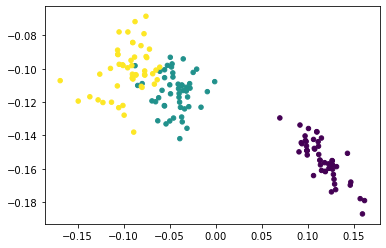

In [107]:
iris = ds.load_iris()
iris_y = iris.data.T
iris_classes = iris.target

### Perform PPCA

In [ ]:
ppca = PPCA()
ppca.fit(iris_y, verbose=True)
x = ppca.transform()

### Plot result

In [ ]:
ax = plt.gca() 
ax.scatter(x[0, :], x[1, :], c=iris_classes, s=20)